In [1]:
# Import Necessaries
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [2]:
# Model Structure
from tensorflow.keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Create Model Structure
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 4 # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.InceptionV3(include_top= False, input_shape= img_shape)
base_model.trainable = False

# Model Architecture
model = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.4),
    Dense(class_count, activation='softmax')], name="Inception-TL")

# Compile Model 
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "Inception-TL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 22,328,356
Trainable params: 525,572
Non-trainable params: 21,802,784
____________________________________

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model, class_labels):
    
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Vehicle: {predicted_class_label}")
    plt.show()

# Load your trained model
model.load_weights('my_model_2_weights_copy.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['Bus', 'Car', 'Truck', 'Motorcycle']

1/1 [==============================] - 0s 77ms/step


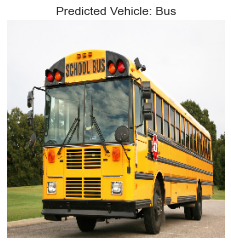

In [24]:
image_path_to_test = 'Dataset/Bus/Image_1.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 168ms/step


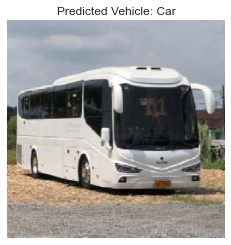

In [8]:
image_path_to_test = 'Demo/Bus/test_01.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 92ms/step


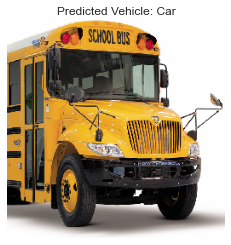

In [9]:
image_path_to_test = 'Demo/Bus/test_02.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 84ms/step


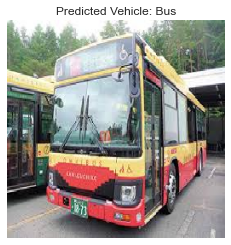

In [10]:
image_path_to_test = 'Demo/Bus/test_03.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 105ms/step


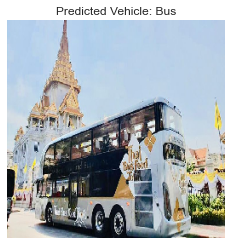

In [11]:
image_path_to_test = 'Demo/Bus/test_04.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 86ms/step


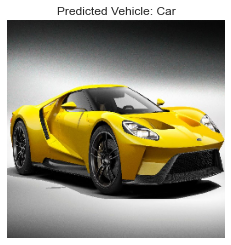

In [25]:
image_path_to_test = 'Dataset/Car/Image_1.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 86ms/step


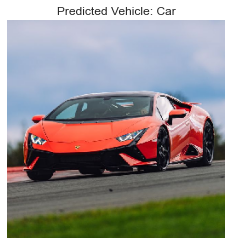

In [12]:
image_path_to_test = 'Demo/Car/test_01.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 86ms/step


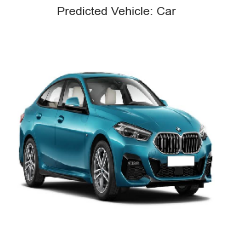

In [13]:
image_path_to_test = 'Demo/Car/test_02.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 82ms/step


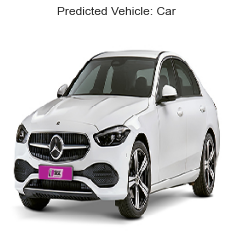

In [14]:
image_path_to_test = 'Demo/Car/test_03.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 90ms/step


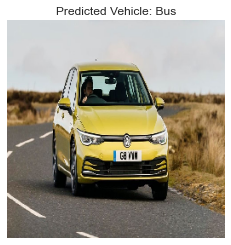

In [15]:
image_path_to_test = 'Demo/Car/test_04.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 87ms/step


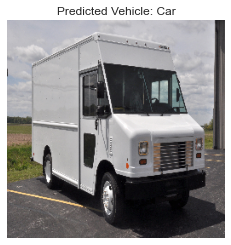

In [26]:
image_path_to_test = 'Dataset/Truck/Image_1.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 80ms/step


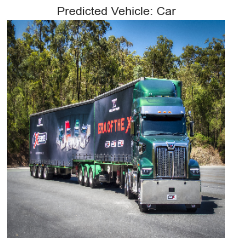

In [16]:
image_path_to_test = 'Demo/Truck/test_01.JPG'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 144ms/step


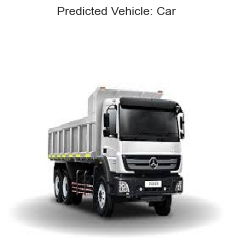

In [17]:
image_path_to_test = 'Demo/Truck/test_02.JPG'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 74ms/step


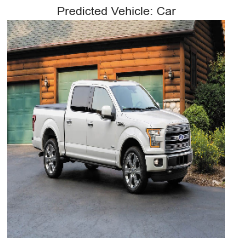

In [18]:
image_path_to_test = 'Demo/Truck/test_03.JPG'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 83ms/step


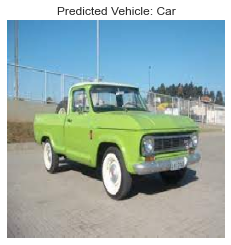

In [19]:
image_path_to_test = 'Demo/Truck/test_04.JPG'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 78ms/step


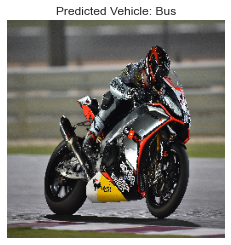

In [27]:
image_path_to_test = 'Dataset/motorcycle/Image_1.jpeg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 68ms/step


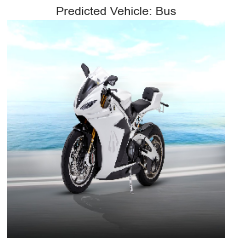

In [20]:
image_path_to_test = 'Demo/motorcycle/test_01.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 84ms/step


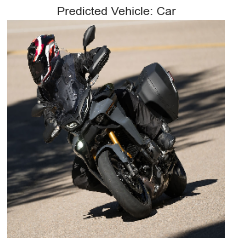

In [21]:
image_path_to_test = 'Demo/motorcycle/test_02.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 89ms/step


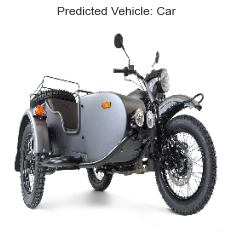

In [22]:
image_path_to_test = 'Demo/motorcycle/test_03.jpg'
predict_and_display(image_path_to_test, model, class_labels)

1/1 [==============================] - 0s 119ms/step


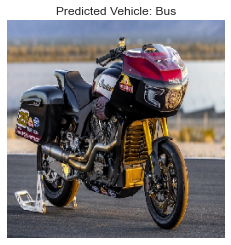

In [23]:
image_path_to_test = 'Demo/motorcycle/test_04.jpg'
predict_and_display(image_path_to_test, model, class_labels)